# ShapeNet

## Dataset

In [ ]:
import torch
from torch import nn
from torch import optim
import os
import os.path as osp

import pytorch_lightning as pl

from torch.utils.data import DataLoader
from data.ShapeNet.ShapeNetDataLoader import PartNormalDataset

from pytorch_lightning.loggers import WandbLogger

In [2]:
category = 'Airplane'
fixed_points = 1024
num_workers = 10
path = osp.realpath(osp.join('..', 'data', 'ShapeNet/raw'))

test_dataset = PartNormalDataset(root=path, npoints=fixed_points, split='test', class_choice=category)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True, num_workers=num_workers)

In [ ]:
from hpcs.utils.viz import plot_cloud

In [ ]:
cloud = test_dataset.__getitem__(1)

In [ ]:
points, label, targets = cloud

In [ ]:
plotter = plot_cloud(xyz=points, scalars=targets, point_size=3.0, notebook=True)

## Model

In [3]:
import wandb
import yaml
from test import configure

In [4]:
os.remove(os.path.join(os.getcwd(), 'config.yaml'))

In [5]:
os.remove(os.path.join(os.getcwd(), 'model.ckpt'))

In [6]:
config_yaml = wandb.restore(name='config.yaml', run_path='pierreoo/HPCS/runs/ygicywts')
config = yaml.load(config_yaml, Loader=yaml.FullLoader)

In [7]:
model, trainer = configure(config)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Gpu:  0


In [8]:
wandb.restore('model.ckpt', run_path='pierreoo/HPCS/runs/ygicywts')
model = model.load_from_checkpoint('model.ckpt')

Testing: 0it [00:00, ?it/s]

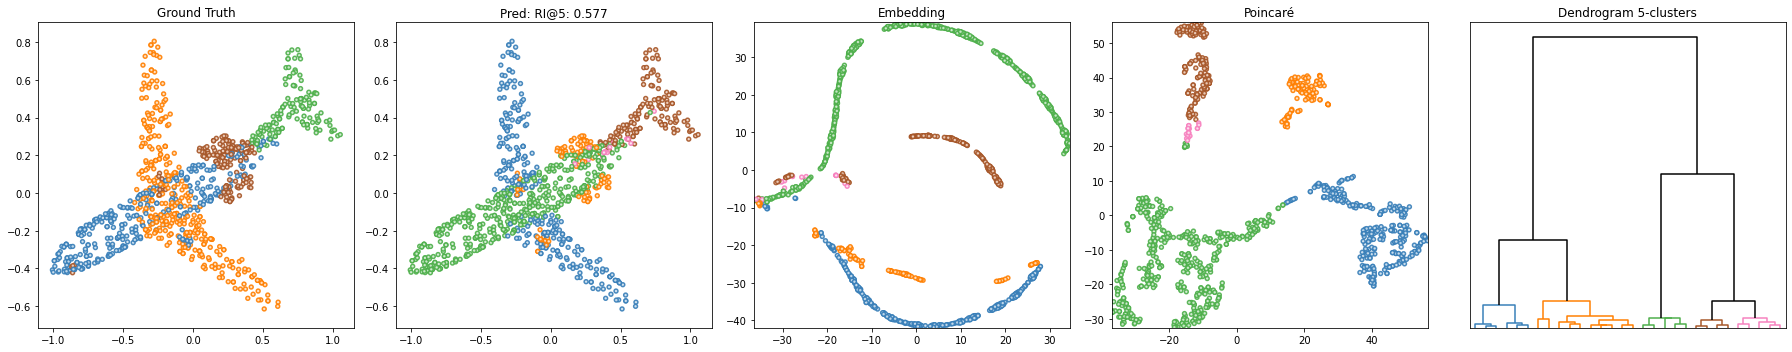

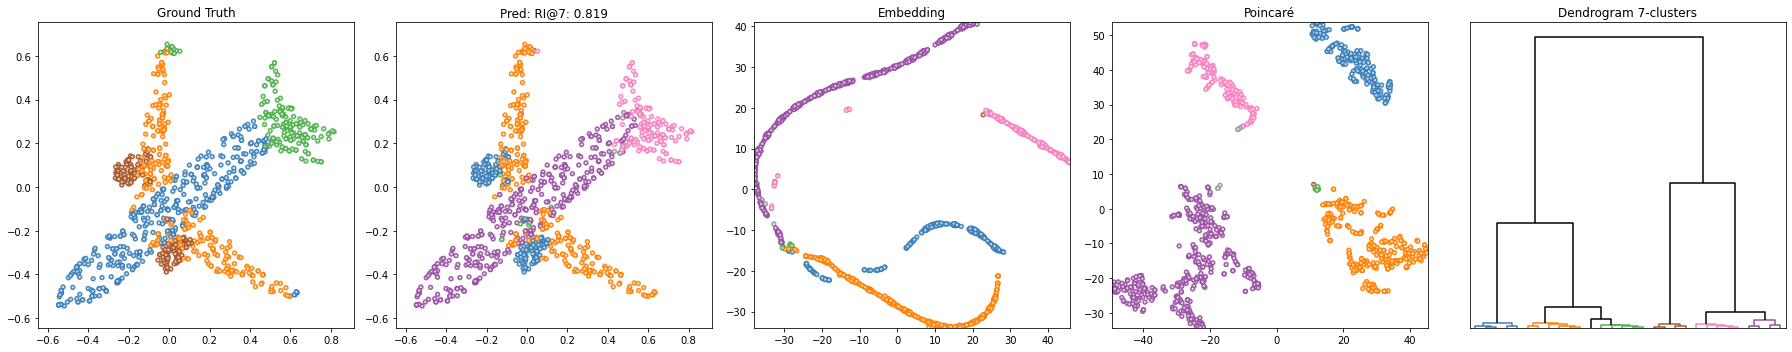

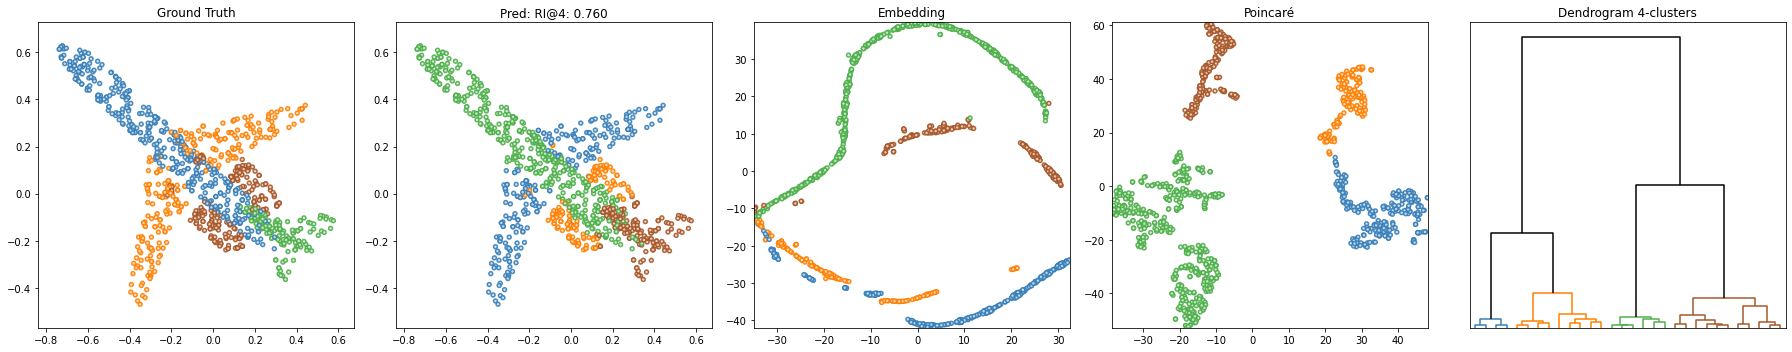

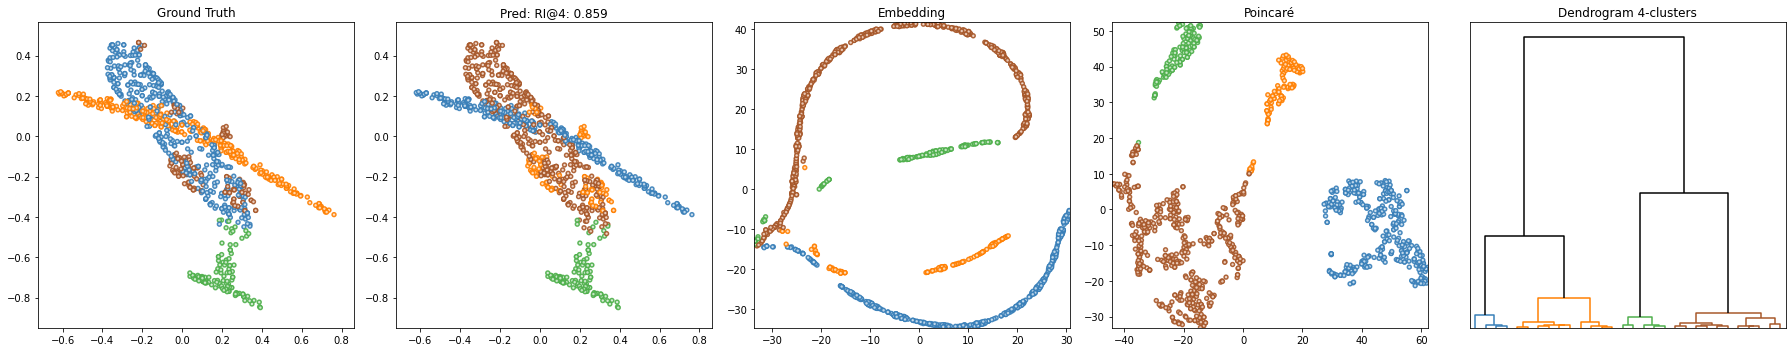

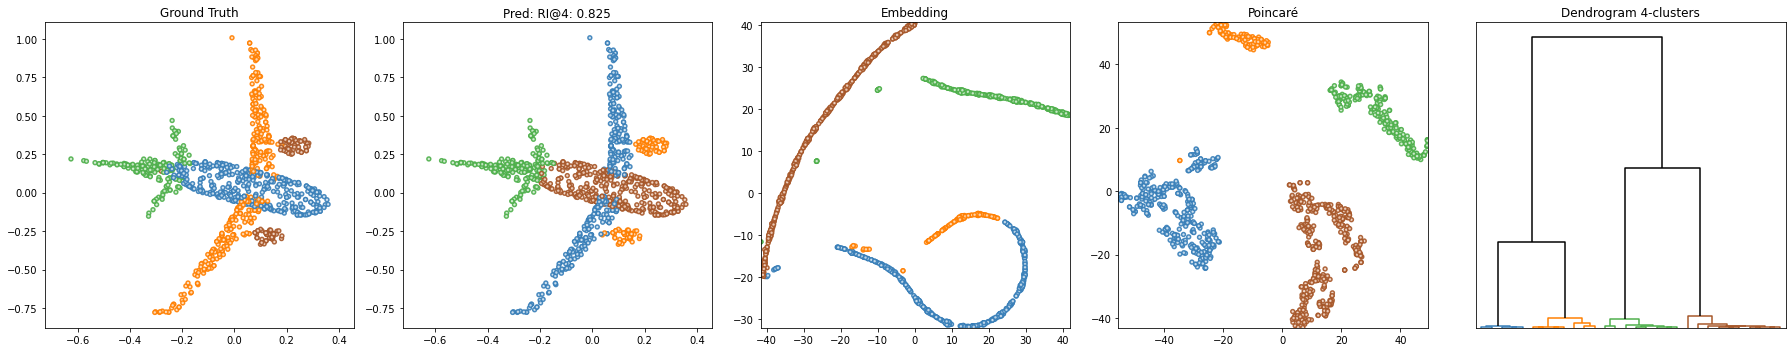

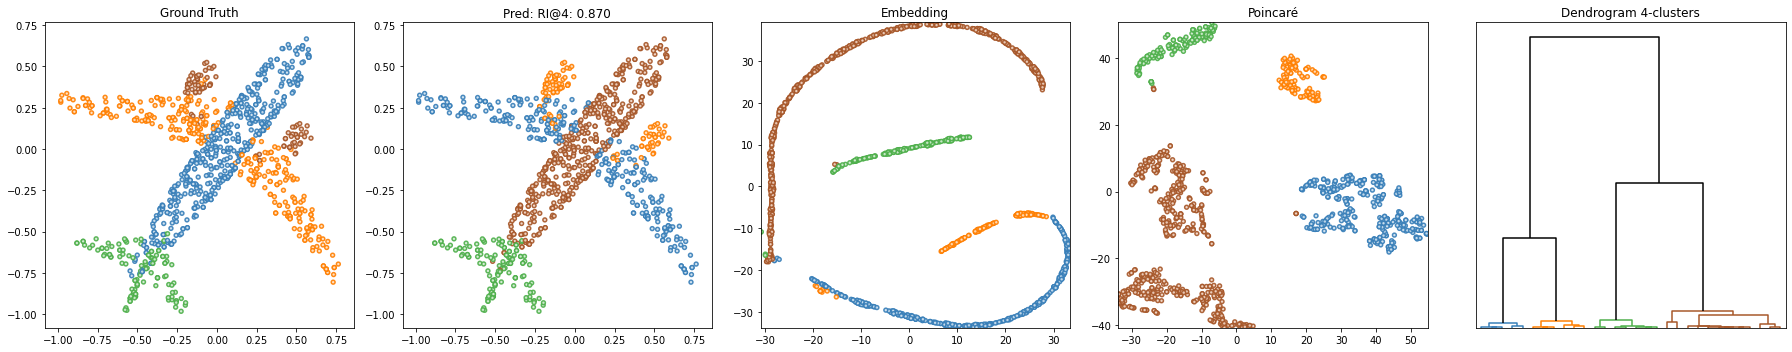

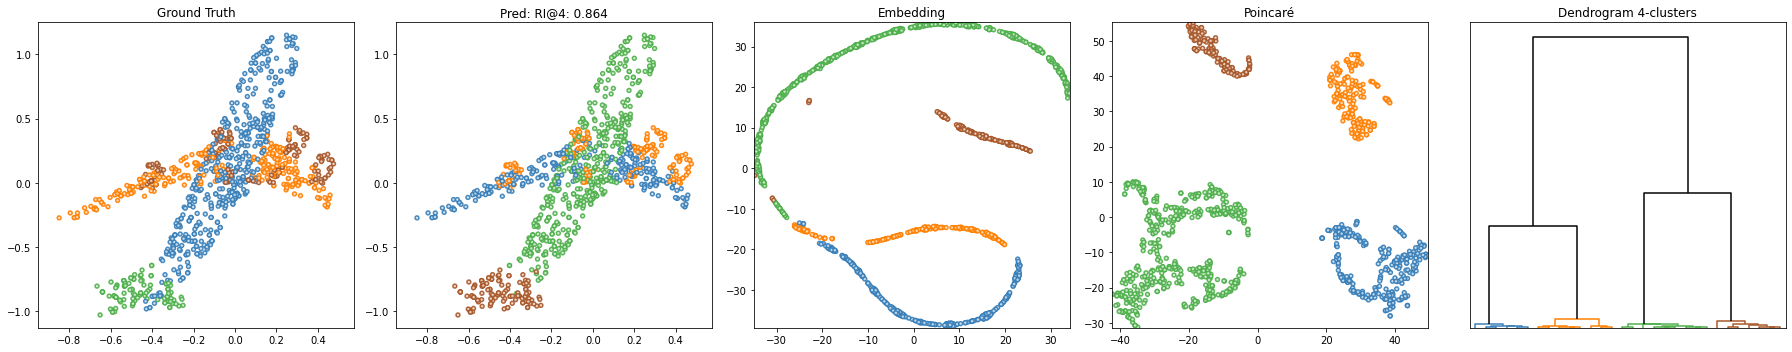

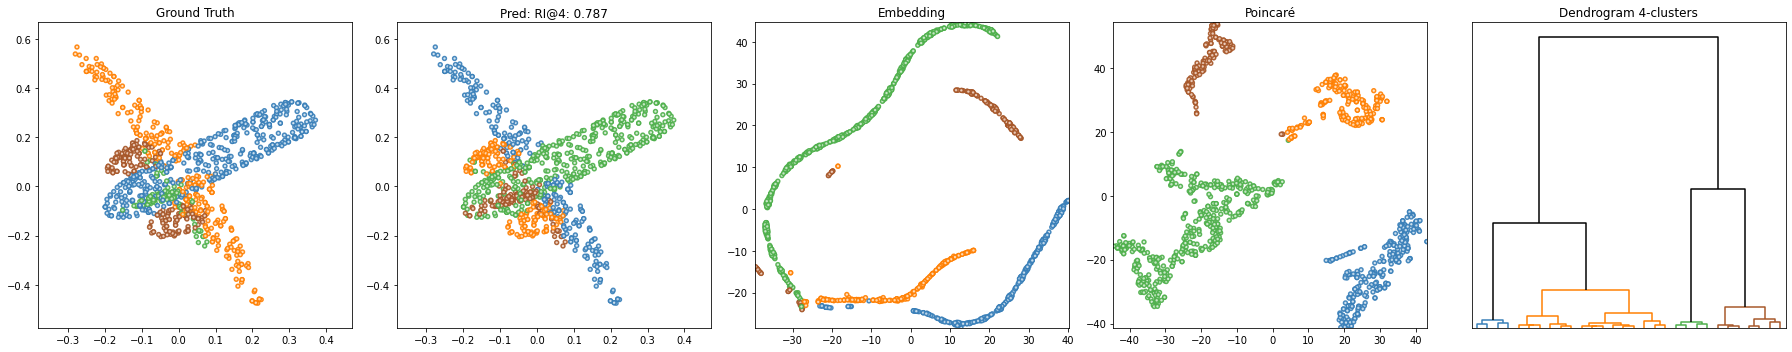

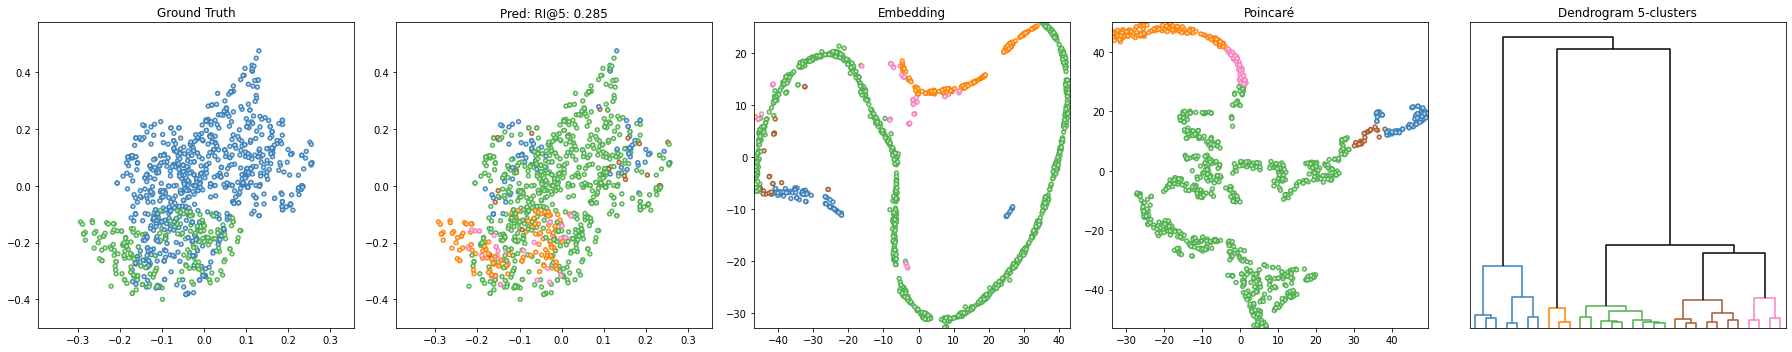

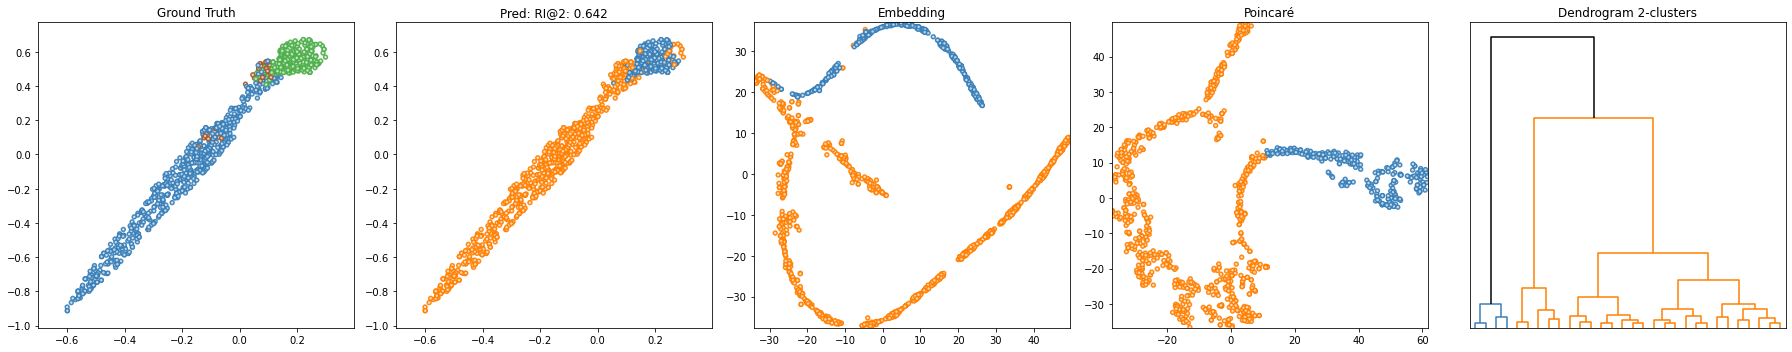

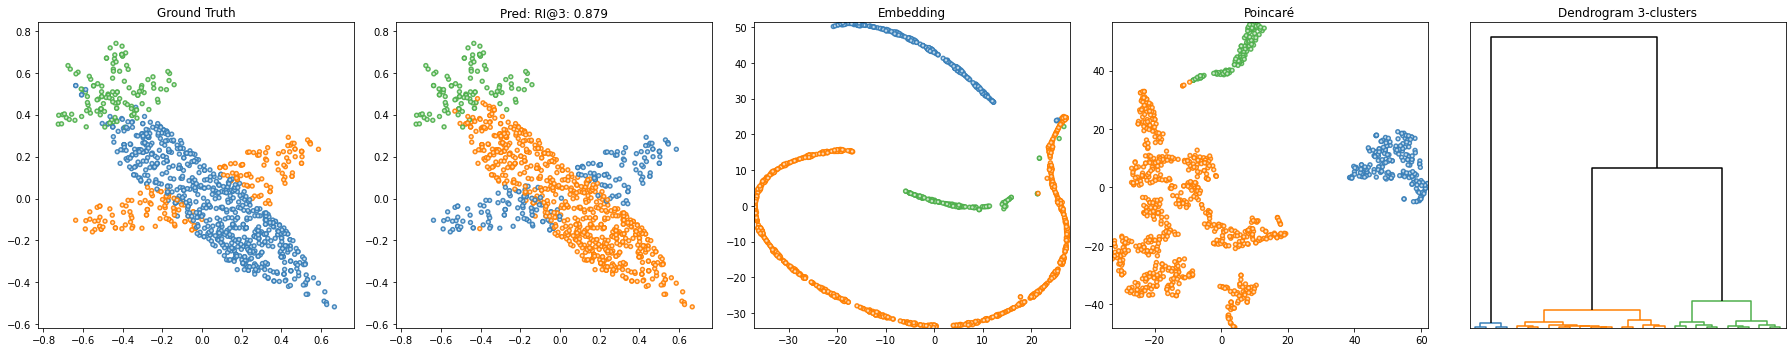

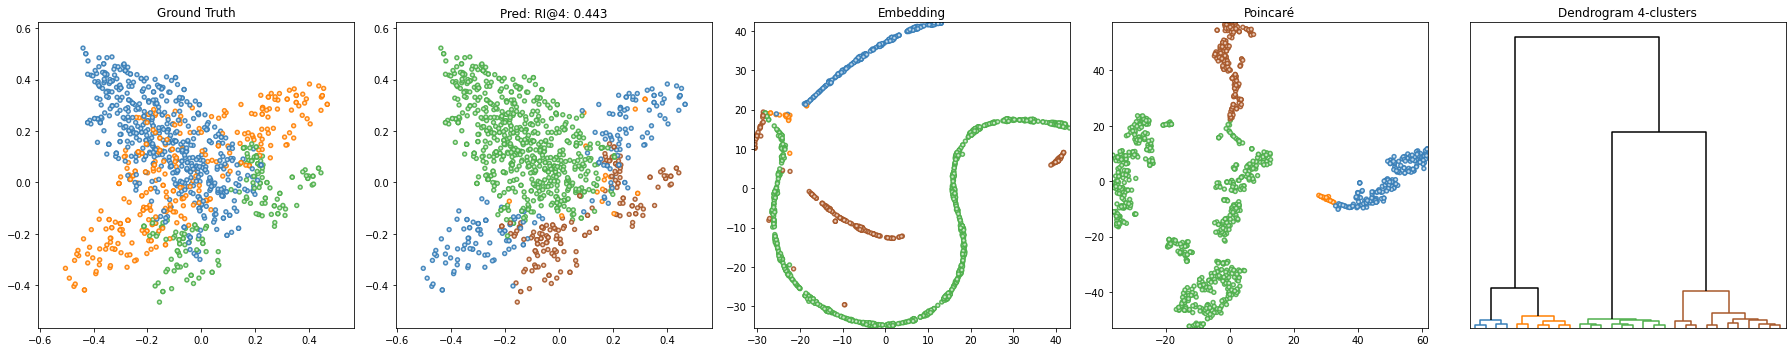

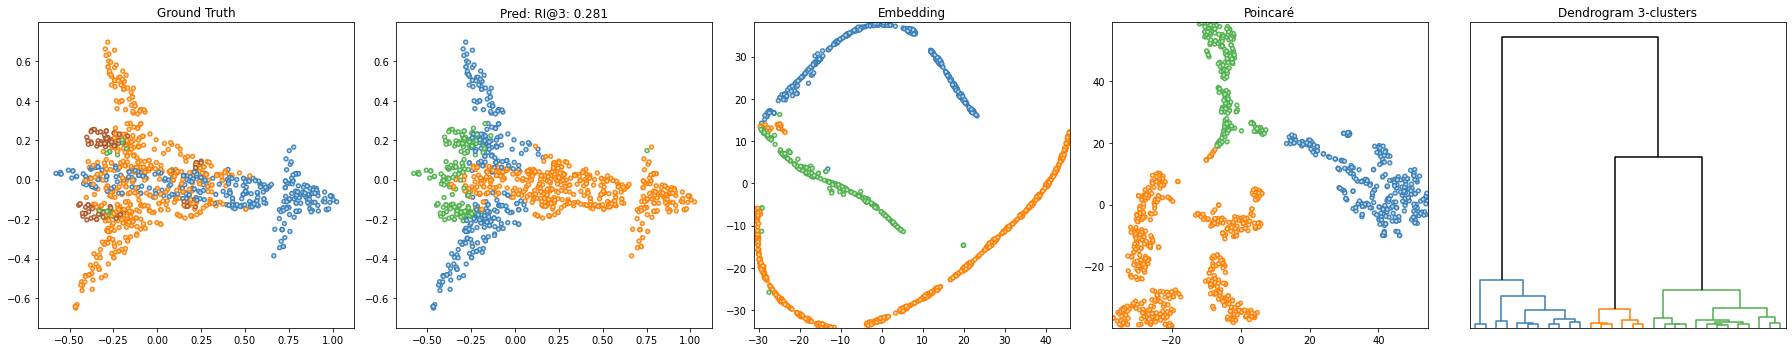

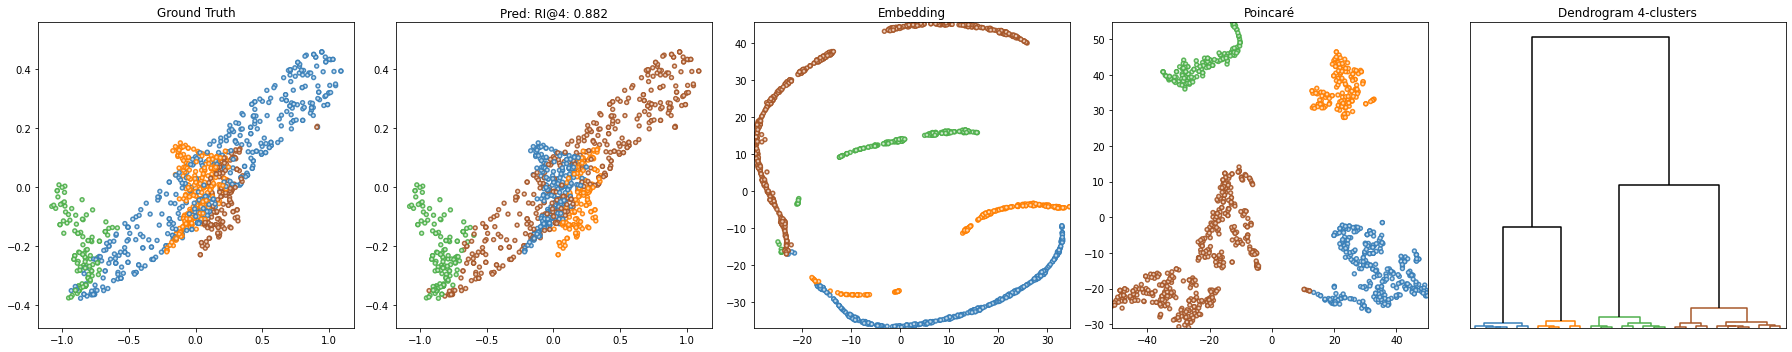

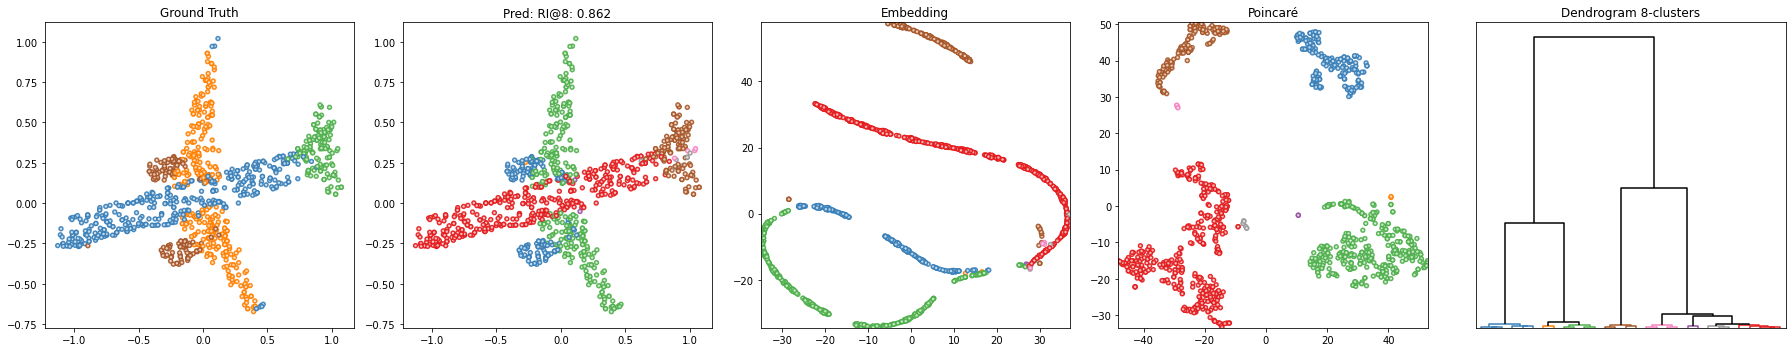

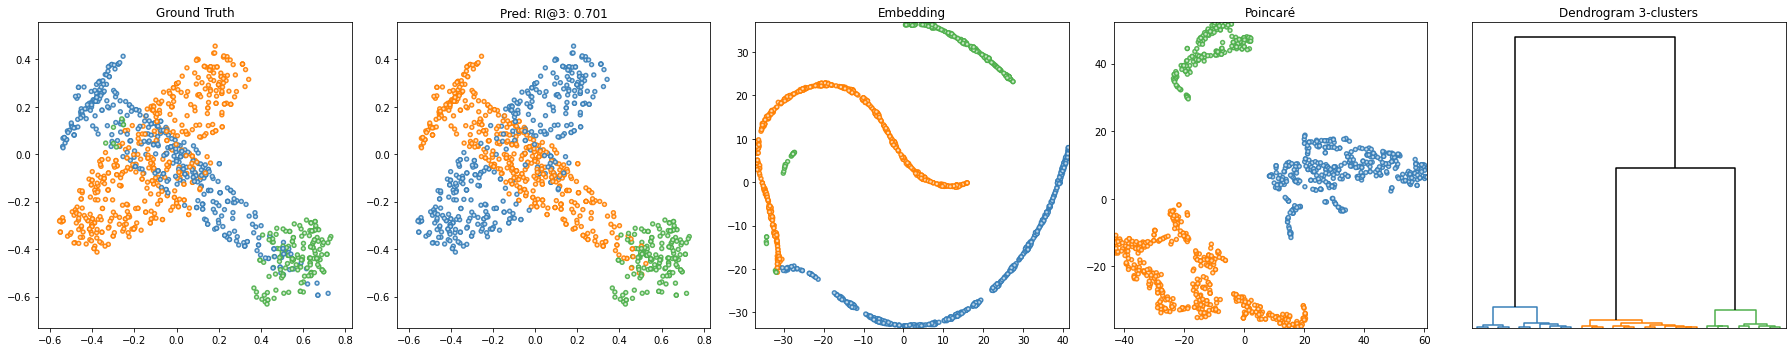

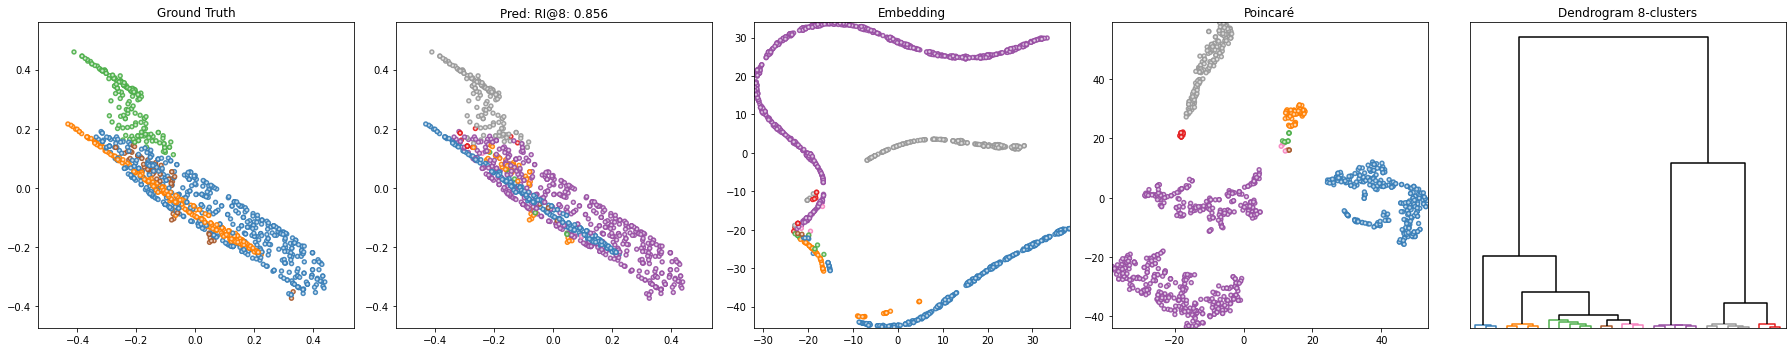

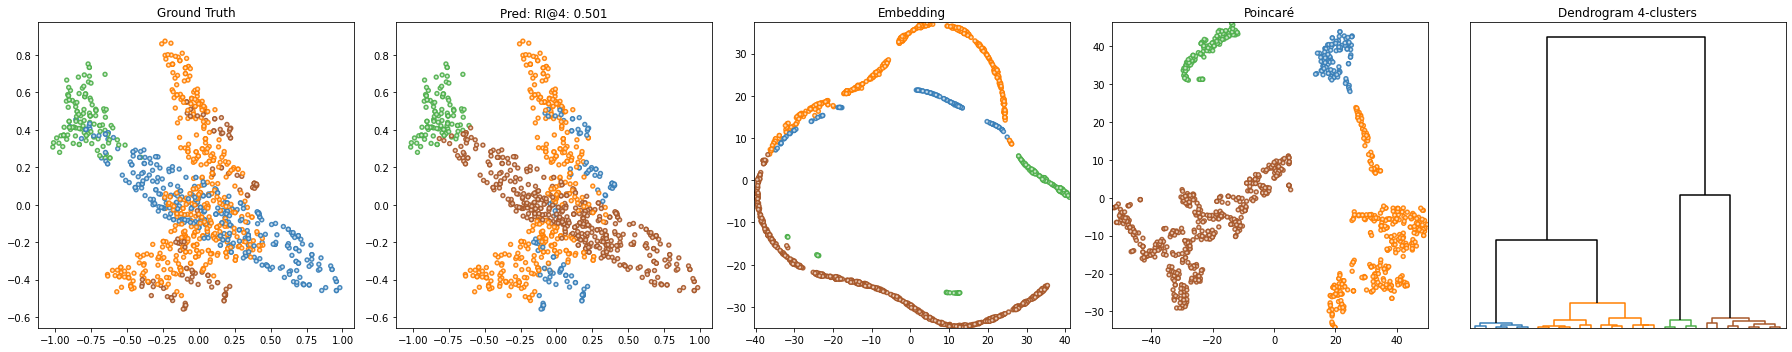

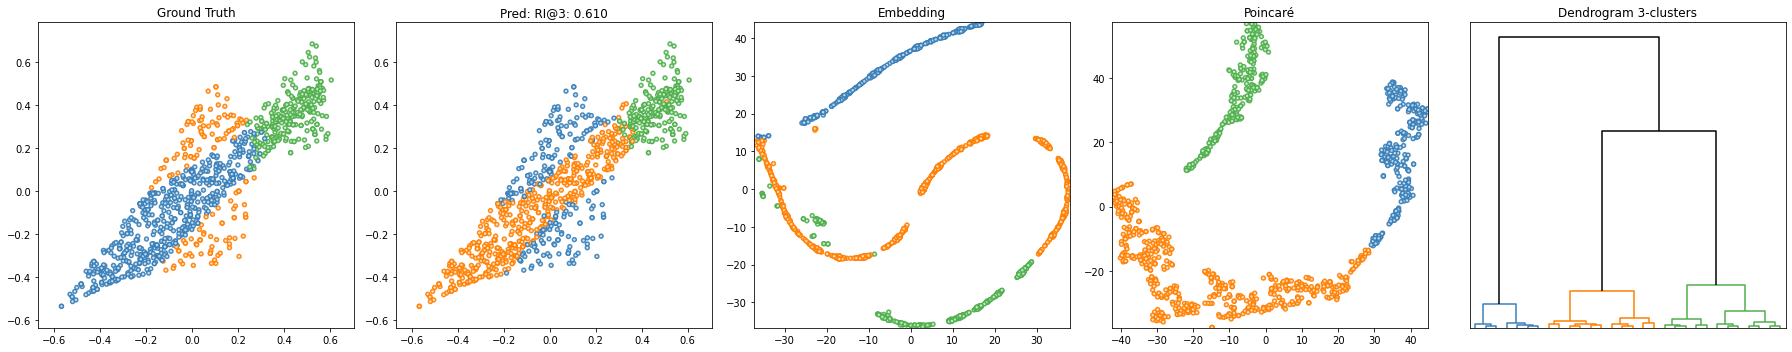

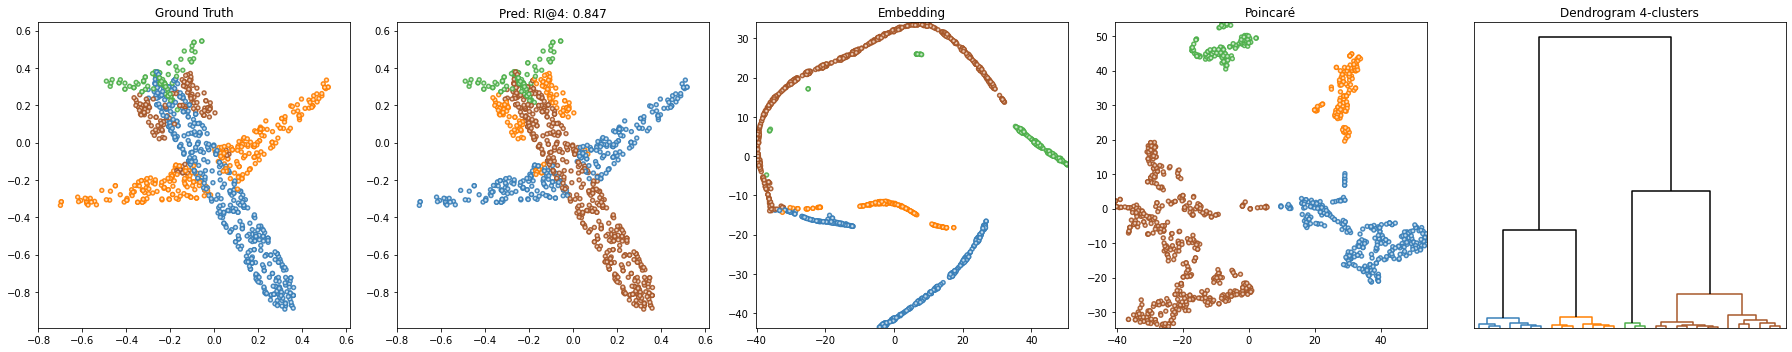

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           1.1323935985565186
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 1.1323935985565186}]

In [9]:
trainer.test(model, test_loader)

In [10]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

scale tensor([0.9131])
model.bn7.weight tensor([0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245])
model.bn7.bias tensor([ 9.3852e-05, -1.1443e-05,  1.6909e-05, -2.2069e-05, -6.1939e-07,
        -7.6472e-06, -3.2110e-05, -1.3830e-05, -1.7314e-05, -1.4001e-05,
        -1.1691e-05, -2.4680e-05, -9.4224e-06,  1.7263e-04, -2.4385e-05,
         4.5009e-05, -1.1974e-05,  7.0595e-05, -1.7465e-05,  4.7358e-05,
        -5.2499e-06, -1.7116e-05, -7.7872e-06, -2.5931e-05, -1.0886e-05,
   

model.conv6.map_to_feat.weight tensor([[ 0.0143, -0.0032,  0.0117,  ...,  0.0257,  0.0013,  0.0401],
        [ 0.0260, -0.0030,  0.0231,  ...,  0.0209, -0.0010,  0.0463],
        [ 0.0889, -0.0433,  0.0297,  ...,  0.0854,  0.0704,  0.0568],
        ...,
        [-0.0099, -0.0643,  0.0464,  ..., -0.0823,  0.0173, -0.0459],
        [ 0.0396, -0.0143,  0.0061,  ..., -0.0477, -0.0454,  0.0124],
        [ 0.0133, -0.0666, -0.0745,  ...,  0.0906,  0.0055,  0.0382]])
model.conv6.batchnorm.bn.weight tensor([0.0494, 0.0522, 0.0527, 0.0551, 0.0536, 0.0523, 0.0547, 0.0538, 0.0553,
        0.0617, 0.0518, 0.0517, 0.0511, 0.0569, 0.0528, 0.0528, 0.0541, 0.0550,
        0.0529, 0.0525, 0.0542, 0.0579, 0.0515, 0.0553, 0.0582, 0.0522, 0.0541,
        0.0520, 0.0575, 0.0552, 0.0564, 0.0600, 0.0498, 0.0528, 0.0538, 0.0554,
        0.0596, 0.0502, 0.0516, 0.0543, 0.0502, 0.0559, 0.0520, 0.0504, 0.0536,
        0.0537, 0.0584, 0.0594, 0.0506, 0.0549, 0.0550, 0.0630, 0.0545, 0.0536,
        0.0554, 0.0543,